In [1]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle 
import pandas as pd 
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
import random 

DATADIR = "/Users/suryakalyanaraman/Desktop/Brain_Tumour_data"
categories = ['glioma','meningioma','notumor','pituitary']

image_data =[]
IMG_SIZE = 50

def create_image_data():
    for category in categories:
        path = os.path.join(DATADIR, category) 
        class_num = categories.index(category)
        #Get the classification 0=glioma | 1=meningioma | 2=no tumor | 3=pituitary
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                image_data.append([new_array, class_num])
                
            except Exception as e:
                pass

create_image_data()

random.shuffle(image_data)

X = []
y = []


for features,label in image_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

X = X/255.0

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.95, test_size=0.05)

In [2]:
print(f'SHAPE OF TRAINING IMAGE DATA : {X_train.shape}')
print(f'SHAPE OF TESTING IMAGE DATA : {X_test.shape}')
print(f'SHAPE OF TRAINING LABELS : {y_train.shape}')
print(f'SHAPE OF TESTING LABELS : {y_test.shape}')

SHAPE OF TRAINING IMAGE DATA : (6671, 50, 50, 1)
SHAPE OF TESTING IMAGE DATA : (352, 50, 50, 1)
SHAPE OF TRAINING LABELS : (6671,)
SHAPE OF TESTING LABELS : (352,)


# Creating the Model 


Metal device set to: Apple M1 Pro
Epoch 1/15


2022-03-30 21:13:32.317278: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-30 21:13:32.317391: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-03-30 21:13:32.425398: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


  4/668 [..............................] - ETA: 11s - loss: 1.3830 - accuracy: 0.3250 

2022-03-30 21:13:32.597532: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


668/668 [==============================] - 4s 6ms/step - loss: 0.6966 - accuracy: 0.7180 - val_loss: 0.5929 - val_accuracy: 0.7670
Epoch 2/15
  1/668 [..............................] - ETA: 7s - loss: 0.8140 - accuracy: 0.5000

2022-03-30 21:13:36.745029: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


668/668 [==============================] - 4s 6ms/step - loss: 0.3875 - accuracy: 0.8594 - val_loss: 0.4050 - val_accuracy: 0.8636
Epoch 3/15
668/668 [==============================] - 4s 6ms/step - loss: 0.2638 - accuracy: 0.9033 - val_loss: 0.2710 - val_accuracy: 0.8949
Epoch 4/15
668/668 [==============================] - 4s 6ms/step - loss: 0.1780 - accuracy: 0.9331 - val_loss: 0.2516 - val_accuracy: 0.9119
Epoch 5/15
668/668 [==============================] - 4s 6ms/step - loss: 0.1327 - accuracy: 0.9514 - val_loss: 0.1842 - val_accuracy: 0.9347
Epoch 6/15
668/668 [==============================] - 4s 6ms/step - loss: 0.0901 - accuracy: 0.9714 - val_loss: 0.1767 - val_accuracy: 0.9489
Epoch 7/15
668/668 [==============================] - 4s 6ms/step - loss: 0.0669 - accuracy: 0.9802 - val_loss: 0.1445 - val_accuracy: 0.9574
Epoch 8/15
668/668 [==============================] - 4s 6ms/step - loss: 0.0498 - accuracy: 0.9847 - val_loss: 0.1462 - val_accuracy: 0.9574
Epoch 9/15
668/66

2022-03-30 21:14:33.741912: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


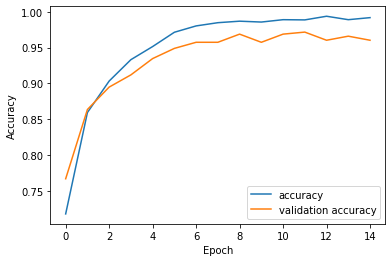

In [3]:
model = Sequential()

model.add(Conv2D(32, (3, 3),input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size =(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size =(2,2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size =(2,2)))

model.add(Flatten())
#This Converts a 3D feature map into a 1D feature vector 
          
model.add(Dense(units=4, activation='softmax'))

model.compile(loss="sparse_categorical_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=10)

val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss, val_acc)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [17]:
predictions = model.evaluate(X_test,y_test)
print(f'LOSS : {predictions[0]}')
print(f'ACCURACY : {predictions[1]}')

11/11 [==============================] - 0s 5ms/step - loss: 0.1735 - accuracy: 0.9602
LOSS : 0.1735287457704544
ACCURACY : 0.9602273106575012


In [18]:
predictions = model.predict(x=X_test, verbose=0)
rounded_predictions = np.argmax(predictions, axis=-1)
cm = confusion_matrix(y_true=y_test, y_pred=rounded_predictions)


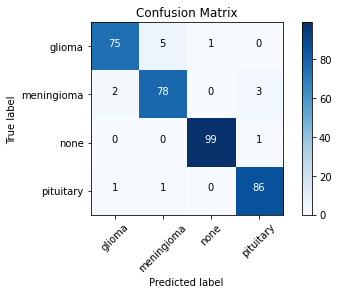

In [19]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

cm_plot_labels = ["glioma", "meningioma", "none", "pituitary"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title="Confusion Matrix")
plt.show()